**DATA PATHS**

In [0]:
# Input data path
root_d = '/content/gdrive/' # the path of parking_dataset


orgin_dir = root_d + 'parking_dataset/'
#orgin_dir = root_d + 'Download_data_example_1/'
train_dir = orgin_dir + "CNR-EXT-Patches-150x150/train_small"
validation_dir = orgin_dir + "CNR-EXT-Patches-150x150/validation_small"
test_dir = orgin_dir + "CNR-EXT-Patches-150x150/test_small"

# Data pre-processing

In the project, you can choose download full dataset and create datatset by **DOWNLOADS FULL DATABASE** (about 1.6 GB), or **DOWNLOADS SMALL COMPRESSION  DATASET** (about 500 MB) from google drive that include 5000 images train dataset

### **DOWNLOADS FULL DATABASE** and Create train, validation and test dataset from 

##### Download and Create **train, validation and test dataset** in CNR-EXT datbase (link: http://cnrpark.it/)


In [0]:
# Save all train, test, val dataset
import os
import shutil
import time
from zipfile import ZipFile 
import requests
import tarfile
#root_dir = '/content/gdrive/' + 'parking_dataset_a/'
#dataset_dir = root_dir + 'CNR-EXT-Patches-150x150/'

root_dir = orgin_dir
dataset_dir = orgin_dir + 'CNR-EXT-Patches-150x150/'

def download_zip(save_d):
    # download the dataset
    if not os.path.exists(save_d):
        os.makedirs(save_d)
    url = 'http://cnrpark.it/dataset/CNR-EXT-Patches-150x150.zip'
    myfile = requests.get(url)
    fn = save_d + 'CNR-EXT-Patches-150x150.zip'
    open(fn, 'wb').write(myfile.content)

    # opening the zip file in READ mode 
    with ZipFile(fn, 'r') as zip: 
        # printing all the contents of the zip file 
        zip.printdir() 
        # extracting all the files 
        print('Extracting all the files now...') 
        zip.extractall(save_d) 
        print('Done!') 

def download_tar(save_d):
    # download the dataset
    if not os.path.exists(save_d):
        os.makedirs(save_d)
    url = 'http://cnrpark.it/dataset/CNR-EXT_FULL_IMAGE_1000x750.tar'
    myfile = requests.get(url)
    file_dir = save_d + 'full_image_and_csv.tar'
    print('Downloading all the files now...') 
    open(file_dir, 'wb').write(myfile.content)
    print('Done!')
    print('Extracting all the files now...') 
    tar = tarfile.open(file_dir)
    tar.extractall(save_d)
    tar.close()
    print('Done!\n')

def create_save_path(save_dir):
    if not os.path.exists(save_dir + 'train/busy'):
        os.makedirs(save_dir + 'train/busy')
    if not os.path.exists(save_dir + 'train/free'):
        os.makedirs(save_dir + 'train/free')
    if not os.path.exists(save_dir + 'test/busy'):
        os.makedirs(save_dir + 'test/busy')
    if not os.path.exists(save_dir + 'test/free'):
        os.makedirs(save_dir + 'test/free')
    if not os.path.exists(save_dir + 'val/busy'):
        os.makedirs(save_dir + 'val/busy')
    if not os.path.exists(save_dir + 'val/free'):
        os.makedirs(save_dir + 'val/free')

def create_parking_dataset(save_dir):
    create_save_path(save_dir)
    download_zip(root_dir)
    download_tar(root_dir)
    f_n = root_dir + 'LABELS/'
    fn = f_n + 'train.txt'
    train_path = [line for line in open(f_n + 'train.txt')]
    test_path = [line for line in open(f_n + 'test.txt')]
    val_path = [line for line in open(f_n + 'val.txt')]    
    #print(val_path)
    
    count = 0
    nb = 0
    nf = 0
    for li in train_path:
        count += 1
        source_n = li.split(' ')[0]
        source_n = root_dir + 'PATCHES/' + source_n
        print('\r',str(count),' ',source_n,end='')
        bl = int(li.split(' ')[1])
        if bl == 1:
            sname = save_dir + 'train/busy/' + li.split(' ')[0].split('/')[-1]
            nb += 1
        else:
            sname = save_dir + 'train/free/' + li.split(' ')[0].split('/')[-1]
            nf += 1
        print('\r',str(count),' ',sname,end='')
        shutil.copy(source_n, sname)

    print('\nCNR-EXT train dataset\nBusy image:%d\nFree image:%d'%(nb, nf))
    print('Total image in train dataset:%d\n'%(nb+nf))

    nb_before = nb
    nf_before = nf
    count = 0
    for li in test_path:
        count += 1  
        source_n = li.split(' ')[0]
        source_n = root_dir + 'PATCHES/' + source_n
        #print('\r',str(count),' ',source_n,end='')
        bl = int(li.split(' ')[1])
        if bl == 1:
            sname = save_dir + 'test/busy/' + li.split(' ')[0].split('/')[-1]
            nb += 1
        else:
            sname = save_dir + 'test/free/' + li.split(' ')[0].split('/')[-1]
            nf += 1
        print('\r',str(count),' ',source_n,end='')
        shutil.copy(source_n, sname)

    print('\nCNR-EXT test dataset\nBusy image:%d\nFree image:%d'%(nb-nb_before, nf-nf_before))
    print('Total image in test dataset:%d\n'%(nb+nf-nb_before-nf_before))

    nb_before = nb
    nf_before = nf
    count = 0
    for li in val_path:
        count += 1
        source_n = li.split(' ')[0]
        source_n = root_dir + 'PATCHES/' + source_n
        
        bl = int(li.split(' ')[1])
        if bl == 1:
            sname = save_dir + 'val/busy/' + li.split(' ')[0].split('/')[-1]
            nb += 1
        else:
            sname = save_dir + 'val/free/' + li.split(' ')[0].split('/')[-1]
            nf += 1
        print('\r',str(count),' ',source_n,end='')
        shutil.copy(source_n, sname)
    print('\nCNR-EXT val dataset\nBusy image:%d\nFree image:%d'%(nb-nb_before, nf-nf_before))
    print('Total image in val dataset:%d\n'%(nb+nf-nb_before-nf_before))

    print('\n\n>>>CNR-EXT database\nBusy image:%d\nFree image:%d'%(nb-nb_before, nf-nf_before))
    print('Total image in CNR-EXT database:%d\n'%(nb+nf-nb_before-nf_before))

def create_small_parking_dataset(save_dir):
    if not os.path.exists(save_dir + 'train_samll/busy'):
        os.makedirs(save_dir + 'train_samll/busy')
    if not os.path.exists(save_dir + 'train_samll/free'):
        os.makedirs(save_dir + 'train_samll/free')
    if not os.path.exists(save_dir + 'test_small/busy'):
        os.makedirs(save_dir + 'test_small/busy')
    if not os.path.exists(save_dir + 'test_small/free'):
        os.makedirs(save_dir + 'test_small/free')
    if not os.path.exists(save_dir + 'val_small/busy'):
        os.makedirs(save_dir + 'val_small/busy')
    if not os.path.exists(save_dir + 'val_small/free'):
        os.makedirs(save_dir + 'val_small/free')
    download_zip(root_dir)
    download_tar(root_dir)
    f_n = root_dir + 'LABELS/'
    fn = f_n + 'train.txt'
    train_path = [line for line in open(f_n + 'train.txt')]
    test_path = [line for line in open(f_n + 'test.txt')]
    val_path = [line for line in open(f_n + 'val.txt')]    
    #print(val_path)
    
    count = 0
    for li in train_path:
        if count == 5000:
            break
        count += 1
        source_n = li.split(' ')[0]
        source_n = root_dir + 'PATCHES/' + source_n
        print('\r',str(count),' ',source_n,end='')
        bl = int(li.split(' ')[1])
        if bl == 1:
            sname = save_dir + 'train_samll/busy/' + li.split(' ')[0].split('/')[-1]
        else:
            sname = save_dir + 'train_small/free/' + li.split(' ')[0].split('/')[-1]
        print('\r',str(count),' ',sname,end='')
        shutil.copy(source_n, sname)
    
    count = 0
    for li in test_path:
        if count == 1500:
            break
        count += 1  
        source_n = li.split(' ')[0]
        source_n = root_dir + 'PATCHES/' + source_n
        #print('\r',str(count),' ',source_n,end='')
        bl = int(li.split(' ')[1])
        if bl == 1:
            sname = save_dir + 'test_small/busy/' + li.split(' ')[0].split('/')[-1]
        else:
            sname = save_dir + 'test_small/free/' + li.split(' ')[0].split('/')[-1]
        print('\r',str(count),' ',source_n,end='')
        shutil.copy(source_n, sname)

    count = 0
    for li in val_path:
        if count == 1500:
            break
        count += 1
        source_n = li.split(' ')[0]
        source_n = root_dir + 'PATCHES/' + source_n
        
        bl = int(li.split(' ')[1])
        if bl == 1:
            sname = save_dir + 'val_small/busy/' + li.split(' ')[0].split('/')[-1]
        else:
            sname = save_dir + 'val_small/free/' + li.split(' ')[0].split('/')[-1]
        print('\r',str(count),' ',source_n,end='')
        shutil.copy(source_n, sname)

# main part
if __name__ == '__main__':
    create_parking_dataset(dataset_dir)
    create_small_parking_dataset(dataset_dir)
    print('\nFinish created CNR-EXT dataset!\n')

Streaming output truncated to the last 5000 lines.
PATCHES/SUNNY/2016-01-18/camera5/S_2016-01-18_14.44_C05_276.jpg 2017-01-13 21:09:44         1893
PATCHES/SUNNY/2016-01-18/camera5/S_2016-01-18_16.44_C05_201.jpg 2017-01-13 21:09:44         5159
PATCHES/SUNNY/2016-01-18/camera5/S_2016-01-18_14.44_C05_274.jpg 2017-01-13 21:09:44         2159
PATCHES/SUNNY/2016-01-18/camera5/S_2016-01-18_12.14_C05_271.jpg 2017-01-13 21:09:44         4055
PATCHES/SUNNY/2016-01-18/camera5/S_2016-01-18_11.14_C05_297.jpg 2017-01-13 21:09:44         2609
PATCHES/SUNNY/2016-01-18/camera5/S_2016-01-18_08.14_C05_232.jpg 2017-01-13 21:09:44         2256
PATCHES/SUNNY/2016-01-18/camera5/S_2016-01-18_16.44_C05_234.jpg 2017-01-13 21:09:44         3178
PATCHES/SUNNY/2016-01-18/camera5/S_2016-01-18_15.14_C05_231.jpg 2017-01-13 21:09:44         3905
PATCHES/SUNNY/2016-01-18/camera5/S_2016-01-18_15.44_C05_274.jpg 2017-01-13 21:09:44         3570
PATCHES/SUNNY/2016-01-18/camera5/S_2016-01-18_10.44_C05_273.jpg 2017-01-13 2

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
PATCHES/RAINY/2015-12-22/camera8/R_2015-12-22_16.27_C08_244.jpg 2017-01-13 21:11:00         3408
PATCHES/RAINY/2015-12-22/camera8/R_2015-12-22_13.55_C08_282.jpg 2017-01-13 21:11:00         4214
PATCHES/RAINY/2015-12-22/camera8/R_2015-12-22_13.55_C08_283.jpg 2017-01-13 21:11:00         3367
PATCHES/RAINY/2015-12-22/camera8/R_2015-12-22_07.51_C08_285.jpg 2017-01-13 21:11:00         2392
PATCHES/RAINY/2015-12-22/camera8/R_2015-12-22_16.27_C08_315.jpg 2017-01-13 21:11:00         2303
PATCHES/RAINY/2015-12-22/camera8/R_2015-12-22_13.25_C08_289.jpg 2017-01-13 21:11:00         3171
PATCHES/RAINY/2015-12-22/camera8/R_2015-12-22_12.54_C08_213.jpg 2017-01-13 21:11:00         3289
PATCHES/RAINY/2015-12-22/camera8/R_2015-12-22_14.26_C08_286.jpg 2017-01-13 21:11:00         3976
PATCHES/RAINY/2015-12-22/camera8/R_2015-12-22_15.26_C08_246.jpg 2017-01-13 21:11:00         3811
PATCHES/RAINY/2015-12-22/camera8/R_2015-12-22_08.21_C08_252.jpg 2017-01-13 2

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
PATCHES/RAINY/2015-11-21/camera4/R_2015-11-21_09.46_C04_265.jpg 2017-01-13 21:12:10         1638
PATCHES/RAINY/2015-11-21/camera4/R_2015-11-21_08.16_C04_194.jpg 2017-01-13 21:12:10         2952
PATCHES/RAINY/2015-11-21/camera4/R_2015-11-21_10.16_C04_266.jpg 2017-01-13 21:12:10         1441
PATCHES/RAINY/2015-11-21/camera4/R_2015-11-21_16.16_C04_221.jpg 2017-01-13 21:12:10         2043
PATCHES/RAINY/2015-11-21/camera4/R_2015-11-21_09.16_C04_227.jpg 2017-01-13 21:12:10         2121
PATCHES/RAINY/2015-11-21/camera4/R_2015-11-21_09.16_C04_298.jpg 2017-01-13 21:12:10         1671
PATCHES/RAINY/2015-11-21/camera4/R_2015-11-21_11.46_C04_303.jpg 2017-01-13 21:12:10         2062
PATCHES/RAINY/2015-11-21/camera4/R_2015-11-21_15.16_C04_192.jpg 2017-01-13 21:12:10         2762
PATCHES/RAINY/2015-11-21/camera4/R_2015-11-21_12.46_C04_196.jpg 2017-01-13 21:12:10         4959
PATCHES/RAINY/2015-11-21/camera4/R_2015-11-21_11.16_C04_267.jpg 2017-01-13 2

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
PATCHES/OVERCAST/2015-11-16/camera4/O_2015-11-16_12.16_C04_231.jpg 2017-01-13 21:13:26         3448
PATCHES/OVERCAST/2015-11-16/camera4/O_2015-11-16_10.16_C04_222.jpg 2017-01-13 21:13:26         3633
PATCHES/OVERCAST/2015-11-16/camera4/O_2015-11-16_12.46_C04_303.jpg 2017-01-13 21:13:26         3001
PATCHES/OVERCAST/2015-11-16/camera4/O_2015-11-16_12.46_C04_267.jpg 2017-01-13 21:13:26         3279
PATCHES/OVERCAST/2015-11-16/camera4/O_2015-11-16_09.16_C04_229.jpg 2017-01-13 21:13:26         1981
PATCHES/OVERCAST/2015-11-16/camera4/O_2015-11-16_10.16_C04_192.jpg 2017-01-13 21:13:26         4426
PATCHES/OVERCAST/2015-11-16/camera4/O_2015-11-16_15.46_C04_224.jpg 2017-01-13 21:13:26         3231
PATCHES/OVERCAST/2015-11-16/camera4/O_2015-11-16_14.16_C04_301.jpg 2017-01-13 21:13:26         2675
PATCHES/OVERCAST/2015-11-16/camera4/O_2015-11-16_15.46_C04_262.jpg 2017-01-13 21:13:26         3586
PATCHES/OVERCAST/2015-11-16/camera4/O_2015-11-16_

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Done!
Done!
Extracting all the files now...
Done!

 1   /content/gdrive/Download_data_example_1/CNR-EXT-Patches-150x150train/busy/S_2015-11-12_12.26_C08_280.jpg

FileNotFoundError: ignored

##### **(!!Test dataset is about 5GB!!, and it is only the extend data!!)**
Create Testing dataset from PKLot database (link: https://web.inf.ufpr.br/vri/databases/parking-lot-database/)

In [0]:
import os
import shutil
import time
import requests
import tarfile
root_dir = '/content/gdrive/PKlot_test/'



#source_d = root_d + 'PkLot/PKLotSegmented/UFPR04/'
#source_d = root_d + 'PkLot/PKLotSegmented/UFPR05/'
source_d = root_dir + 'PKlot/PKLotSegmented/' + 'PUC/'
save_d = root_dir

#max_val = 4000
train_d = ''
test_d = ''
val_d = ''

def create_cnn_test_dataset_path(save_dir):
    global train_d
    global test_d
    global val_d
    train_d = save_dir + 'train/'
    test_d = save_dir + 'test/'
    val_d = save_dir + 'val/'
    if not os.path.exists(test_d):
        os.makedirs(test_d)
    if not os.path.exists(test_d + 'busy'):
        os.makedirs(test_d + 'busy')
    if not os.path.exists(test_d + 'free'):
        os.makedirs(test_d + 'free')

def download_zip(root_d):
    # download the dataset
    if not os.path.exists(root_d):
        os.makedirs(root_d)
    url = 'http://www.inf.ufpr.br/vri/databases/PKLot.tar.gz'
    myfile = requests.get(url)
    file_dir = root_dir + 'PKLot.tar.gz'
    print('Downloading all the files now...') 
    open(file_dir, 'wb').write(myfile.content)
    print('Done!')
    print('Extracting all the files now...') 
    tar = tarfile.open(file_dir)
    tar.extractall(root_dir)
    tar.close()
    print('Done!\n')

def copy_cnn_dataset():
    global train_d
    global test_d
    global val_d
    count = 0
    n_free = 0
    n_busy = 0
    create_cnn_test_dataset_path(save_d)
    download_zip(root_dir)
    st = time.time()
    for file_n in os.listdir(source_d):
        fn = source_d + file_n
        for date in os.listdir(fn):
            fn1 = fn + '/' + date
            for status in os.listdir(fn1):
                fn2 = fn1 + '/' + status
                for img_n in os.listdir(fn2):
                    img_d = fn2 + '/' + img_n
                    if status == 'Empty':
                        sname = test_d + 'free/' + img_n
                        n_free += 1

                    elif status == 'Occupied':
                        sname = test_d + 'busy/' + img_n
                        n_busy += 1

                    shutil.copy(img_d, sname)
                    print('\rTime:%f, Success save in:%s\nfree:%d, busy:%d'
                        %(time.time()-st, sname, n_free, n_busy), end='')

    print('PKLot dataset\nBusy image:%d\nFree image:%d'%(n_busy, n_free))
    print('Total image:%d\n'%(n_busy+n_free))
    print('Finish created PKLot dataset!\n')

if __name__ == "__main__":
    copy_cnn_dataset()

### **DOWNLOADS SMALL COMPRESSION  DATASET** (about 500MB)

Data Compression (.npz file) and Uncompression(the small CNR-EXT dataset that included 5000 images train datasest, 1500 images test dataset, and 1000 images val dataset) [**Data compression Link**](https://drive.google.com/drive/folders/19CvrTMxMLYRxb9W1pxiFs1ecgBuy3W-2?usp=sharing)

In [0]:
# Quickly load the data and save to dataset path
from numpy import load
from matplotlib import pyplot
import time
import cv2
# load the dataset
start = time.time()
root_d = '/content/gdrive/a/FYP_2020/data/' + 'dataset_small.npz' # follow the path of before step
#root_d = '/content/gdrive/FYP/cycle_gan_val.npz'
data = load(root_d)

# data['arr_0'] is small_train_busy, data['arr_1'] is small_train_free;
# data['arr_3'] is small_test_busy, data['arr_4'] is small_test_free;
# data['arr_5'] is small_validation_busy, data['arr_6'] is validation_small_free;
train_Busy, train_Free = data['arr_0'], data['arr_1']
test_Busy, test_Free = data['arr_2'], data['arr_3']
val_Busy, val_Free = data['arr_4'], data['arr_5']
print('Loaded: ', train_Busy.shape, train_Free.shape, test_Busy.shape, 
      test_Free.shape, val_Busy.shape, val_Free.shape)

if os.path.exists(train_dir):
    os.makedirs(train_dir)
if os.path.exists(test_dir):
    os.makedirs(test_dir)
if os.path.exists(validation_dir):
    os.makedirs(validation_dir)

    
# create image path
data_d = train_dir + '/busy'
if not os.path.exists(data_d):
  os.makedirs(data_d)
count = 0
for n in range(len(train_Busy)):
    count += 1
    save_n = data_d + '/train_busy_' + str(count) + '.jpg'
    cv2.imwrite(save_n, train_Busy[n])

# create image path  
data_d = train_dir + '/free'
if not os.path.exists(data_d):
  os.makedirs(data_d)
count = 0
for n in range(len(train_Free)):
    count += 1
    save_n = data_d + '/train_free_' + str(count) + '.jpg'
    cv2.imwrite(save_n, train_Free[n])

# create image path
data_d = test_dir + '/busy'
if not os.path.exists(data_d):
  os.makedirs(data_d)
count = 0
for n in range(len(test_Busy)):
    count += 1
    save_n = data_d + '/test_busy_' + str(count) + '.jpg'
    cv2.imwrite(save_n, test_Busy[n])

# create image path
data_d = test_dir + '/free'
if not os.path.exists(data_d):
  os.makedirs(data_d)
count = 0
for n in range(len(test_Free)):
    count += 1
    save_n = data_d + '/test_free_' + str(count) + '.jpg'
    cv2.imwrite(save_n, test_Free[n])

# create image path
data_d = validation_dir + '/busy'
if not os.path.exists(data_d):
  os.makedirs(data_d)
count = 0
for n in range(len(val_Busy)):
    count += 1
    save_n = data_d + '/val_busy_' + str(count) + '.jpg'
    cv2.imwrite(save_n, val_Busy[n])

# create image path
data_d = validation_dir + '/free'
if not os.path.exists(data_d):
  os.makedirs(data_d)
count = 0
for n in range(len(val_Free)):
    count += 1
    save_n = data_d + '/val_free_' + str(count) + '.jpg'
    cv2.imwrite(save_n, val_Free[n])

Loaded:  (2532, 256, 256, 3) (2468, 256, 256, 3) (842, 256, 256, 3) (658, 256, 256, 3) (718, 256, 256, 3) (282, 256, 256, 3)


##### **(NOT NECESSARY)**The process of compression in small train dataset from CNR-EXT

In [0]:
# Data Compression
from os import listdir
from numpy import asarray
from numpy import vstack
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from numpy import savez_compressed
re_size = (150,150)
# load all images in a directory into memory
def load_images(path, size = re_size):
	data_list = list()
	# enumerate filenames in directory, assume all are images
	for filename in listdir(path):
		# load and resize the image
		pixels = load_img(path + filename, target_size=size)
		# convert to n"umpy array
		pixels = img_to_array(pixels)
		# store
		data_list.append(pixels)
	return asarray(data_list)
 
# dataset path
#path = train_dir
#path = '/content/gdrive/FYP/5000data'

# load dataset A
path = train_dir
dataAb = load_images(path + '/busy/')
print('Loaded dataAb: ', dataAb.shape)
dataAf = load_images(path + '/free/')
print('Loaded dataAf: ', dataAf.shape)
path = test_dir
dataBb = load_images(path + '/busy/')
print('Loaded dataBb: ', dataBb.shape)
dataBf = load_images(path + '/free/')
print('Loaded dataBf: ', dataBf.shape)
path = validation_dir
dataCb = load_images(path + '/busy/')
print('Loaded dataCb: ', dataCb.shape)
dataCf = load_images(path + '/free/')
print('Loaded dataCf: ', dataCf.shape)

# save as compressed numpy array
filename = '/content/gdrive/FYP/train_small.npz'
savez_compressed(filename, dataAb, dataAf, dataBb, dataBf, dataCb, dataCf)
#savez_compressed(filename, dataAb, dataAf)
print('Saved dataset: ', filename)

KeyboardInterrupt: ignored

Loaded:  (2532, 256, 256, 3) (2468, 256, 256, 3)


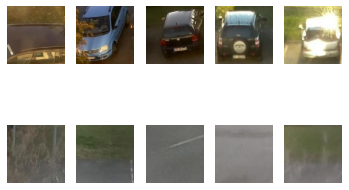

14.08916974067688


In [0]:
# Load the data and display the sample from compression
from numpy import load
from matplotlib import pyplot
import time
# load the dataset
start = time.time()
root_d = '/content/gdrive/FYP/train_small.npz' # follow the path of before step
data = load(root_d)

# data['arr_0'] is small_train_busy, data['arr_1'] is small_train_free;
# data['arr_3'] is small_test_busy, data['arr_4'] is small_test_free;
# data['arr_5'] is small_validation_busy, data['arr_6'] is validation_small_free;
dataBusy, dataFree = data['arr_0'], data['arr_1']
print('Loaded: ', dataBusy.shape, dataFree.shape)
# plot source images
n_samples = 5
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + i)
	pyplot.axis('off')
	pyplot.imshow(dataBusy[i].astype('uint8'))
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + n_samples + i)
	pyplot.axis('off')
	pyplot.imshow(dataFree[i].astype('uint8'))
pyplot.show()
print(str(time.time() - start) + ' seconds')

## Extend data

### CycleGAN

##### **(CHOOSE ONE TO CREATE)**  *Normally will create sunshine and nornal cycle gan dataset*
Create Cycle dataset

###### Create greate sunshine dataset

In [0]:
# Include busy and free
import os
import shutil
import time
import cv2

great_sunshine = 120
save_path = '/content/gdrive/a/FYP_2020/a_great_sunshine/'

'''
train_dir = "/content/gdrive/parking_dataset/CNR-EXT-Patches-150x150/train_small"
validation_dir = "/content/gdrive/parking_dataset/CNR-EXT-Patches-150x150/validation_small"
test_dir = "/content/gdrive/parking_dataset/CNR-EXT-Patches-150x150/test_small"
'''
def check_brightness(image, size = (150, 150)):
    img = cv2.resize(image, size)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.blur(gray, size)
    return cv2.mean(blur)[0]

def create_save_path(save_dir):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    if not os.path.exists(save_dir + 'train/busy'):
        os.makedirs(save_dir + 'train/busy')
    if not os.path.exists(save_dir + 'test/busy'):
        os.makedirs(save_dir + 'test/busy')
    if not os.path.exists(save_dir + 'val/busy'):
        os.makedirs(save_dir + 'val/busy')
     if not os.path.exists(save_dir + 'train/free'):
        os.makedirs(save_dir + 'train/free')
    if not os.path.exists(save_dir + 'test/free'):
        os.makedirs(save_dir + 'test/free')
    if not os.path.exists(save_dir + 'val/free'):
        os.makedirs(save_dir + 'val/free') 

def create_parking_dataset(save_dir):
    create_save_path(save_dir)
    f_n = orgin_dir + 'LABELS/'
    fn = f_n + 'train.txt'
    '''
    train_path_b = os.listdir(train_dir + '/busy/')
    train_path_f = os.listdir(train_dir + '/free/')

    test_path_b = os.listdir(test_dir + '/busy/')
    test_path_f = os.listdir(test_dir + '/free/')

    val_path_b = os.listdir(validation_dir + '/busy/') 
    val_path_f = os.listdir(validation_dir + '/free/') 
    '''
    
    count = 0
    for status in os.listdir(train_dir):
        source_dir = train_dir + '/' + status
        for image in os.listdir(source_dir):
            count += 1
            img_path = source_dir + '/' + image
            print('\r',str(count),' ',img_path,end='')
            img = cv2.imread(img_path)
            n_bright = check_brightness(img, (150, 150))

            print(' bright: ', n_bright)
            if n_bright > great_sunshine:
                sname = save_dir + 'train/' + status + '/' + image
                shutil.copy(img_path, sname)
    
    for status in os.listdir(test_dir):
        source_dir = test_dir + '/' + status
        for image in os.listdir(source_dir):
            count += 1
            img_path = source_dir + '/' + image
            print('\r',str(count),' ',img_path,end='')
            img = cv2.imread(img_path)
            n_bright = check_brightness(img, (150, 150))

            print(' bright: ', n_bright)
            if n_bright > great_sunshine:
                sname = save_dir + 'test/' + status + '/' + image
                shutil.copy(img_path, sname)

    for status in os.listdir(validation_dir):
        source_dir = validation_dir + '/' + status
        for image in os.listdir(source_dir):
            count += 1
            img_path = source_dir + '/' + image
            print('\r',str(count),' ',img_path,end='')
            img = cv2.imread(img_path)
            n_bright = check_brightness(img, (150, 150))

            print(' bright: ', n_bright)
            if n_bright > great_sunshine:
                sname = save_dir + 'val/' + status + '/' + image
                shutil.copy(img_path, sname)
    #batch_images = np.random.choice(path, size = batch_size)

#save_dir = '/content/gdrive/FYP/dataset_fullparking/'
# main part
if __name__ == '__main__':
    create_parking_dataset(save_path)

In [0]:
# No include busy and free
import os
import shutil
import time
from zipfile import ZipFile 
import requests
import cv2

great_sunshine = 120
save_path = '/content/gdrive/a/FYP_2020/a_great_sunshine/'

'''
train_dir = "/content/gdrive/parking_dataset/CNR-EXT-Patches-150x150/train_small"
validation_dir = "/content/gdrive/parking_dataset/CNR-EXT-Patches-150x150/validation_small"
test_dir = "/content/gdrive/parking_dataset/CNR-EXT-Patches-150x150/test_small"
'''

def check_brightness(image, size = (150, 150)):
    img = cv2.resize(image, size)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.blur(gray, size)
    return cv2.mean(blur)[0]

def create_save_path(save_dir):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    if not os.path.exists(save_dir + 'all'):
        os.makedirs(save_dir + 'all')
    if not os.path.exists(save_dir + '120-150'):
        os.makedirs(save_dir + '120-150')
    if not os.path.exists(save_dir + '150+'):
        os.makedirs(save_dir + '150+')

def create_parking_dataset(save_dir):
    create_save_path(save_dir)
    '''
    train_path_b = os.listdir(train_dir + '/busy/')
    train_path_f = os.listdir(train_dir + '/free/')

    test_path_b = os.listdir(test_dir + '/busy/')
    test_path_f = os.listdir(test_dir + '/free/')

    val_path_b = os.listdir(validation_dir + '/busy/') 
    val_path_f = os.listdir(validation_dir + '/free/') 
    '''
    
    count = 0
    for status in os.listdir(train_dir):
        source_dir = train_dir + '/' + status
        for image in os.listdir(source_dir):
            count += 1
            img_path = source_dir + '/' + image
            print('\r',str(count),' ',img_path,end='')
            img = cv2.imread(img_path)
            n_bright = check_brightness(img, (150, 150))

            print(' bright: ', n_bright)
            if n_bright > great_sunshine:
                if n_bright < 150:
                    sname = save_dir + '120-150/' + image
                else:
                    sname = save_dir + '150+/' + image
                shutil.copy(img_path, sname)
                sname = save_dir + 'all/' + image
                shutil.copy(img_path, sname)
    
    for status in os.listdir(test_dir):
        source_dir = test_dir + '/' + status
        for image in os.listdir(source_dir):
            count += 1
            img_path = source_dir + '/' + image
            print('\r',str(count),' ',img_path,end='')
            img = cv2.imread(img_path)
            n_bright = check_brightness(img, (150, 150))

            print(' bright: ', n_bright)
            if n_bright > great_sunshine:
                if n_bright < 150:
                    sname = save_dir + '120-150/' + image
                else:
                    sname = save_dir + '150+/' + image
                shutil.copy(img_path, sname)
                sname = save_dir + 'all/' + image
                shutil.copy(img_path, sname)

    for status in os.listdir(validation_dir):
        source_dir = validation_dir + '/' + status
        for image in os.listdir(source_dir):
            count += 1
            img_path = source_dir + '/' + image
            print('\r',str(count),' ',img_path,end='')
            img = cv2.imread(img_path)
            n_bright = check_brightness(img, (150, 150))

            print(' bright: ', n_bright)
            if n_bright > great_sunshine:
                if n_bright < 150:
                    sname = save_dir + '120-150/' + image
                else:
                    sname = save_dir + '150+/' + image
                shutil.copy(img_path, sname)
                sname = save_dir + 'all/' + image
                shutil.copy(img_path, sname)
    #batch_images = np.random.choice(path, size = batch_size)

#save_dir = '/content/gdrive/FYP/dataset_fullparking/'
# main part
if __name__ == '__main__':
    create_parking_dataset(save_path)

 1   /content/gdrive/parking_dataset/CNR-EXT-Patches-150x150/train_small/busy/S_2016-01-12_16.17_C01_266.jpg bright:  101.5248
 2   /content/gdrive/parking_dataset/CNR-EXT-Patches-150x150/train_small/busy/S_2016-01-12_16.17_C01_267.jpg bright:  115.90702222222222
 3   /content/gdrive/parking_dataset/CNR-EXT-Patches-150x150/train_small/busy/S_2016-01-12_16.17_C03_300.jpg bright:  107.7368888888889
 4   /content/gdrive/parking_dataset/CNR-EXT-Patches-150x150/train_small/busy/S_2016-01-12_16.20_C05_303.jpg bright:  183.79391111111113
 5   /content/gdrive/parking_dataset/CNR-EXT-Patches-150x150/train_small/busy/S_2016-01-12_16.20_C05_308.jpg bright:  118.89431111111112
 6   /content/gdrive/parking_dataset/CNR-EXT-Patches-150x150/train_small/busy/S_2016-01-12_16.20_C06_304.jpg bright:  115.52124444444445
 7   /content/gdrive/parking_dataset/CNR-EXT-Patches-150x150/train_small/busy/S_2016-01-12_16.21_C07_278.jpg bright:  98.00955555555556
 8   /content/gdrive/parking_dataset/CNR-EXT-Patches-

###### Create sunshine and nornal cycle gan dataset

In [0]:
# Save all train, test, val dataset
import os
import shutil
import time
from zipfile import ZipFile 
import requests
import cv2

great_sunshine = 150
save_path = '/content/gdrive/FYP/a_sunshine_cyc_data/'
'''
train_dir = "/content/gdrive/parking_dataset/CNR-EXT-Patches-150x150/train_small"
validation_dir = "/content/gdrive/parking_dataset/CNR-EXT-Patches-150x150/validation_small"
test_dir = "/content/gdrive/parking_dataset/CNR-EXT-Patches-150x150/test_small"
'''
def check_brightness(image, size = (150, 150)):
    img = cv2.resize(image, size)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.blur(gray, size)
    return cv2.mean(blur)[0]

def create_save_path(save_dir):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    if not os.path.exists(save_dir + 'trainA'):
        os.makedirs(save_dir + 'trainA')
    if not os.path.exists(save_dir + 'testA'):
        os.makedirs(save_dir + 'testA')
    if not os.path.exists(save_dir + 'valA'):
        os.makedirs(save_dir + 'valA')
    if not os.path.exists(save_dir + 'trainB'):
        os.makedirs(save_dir + 'trainB')
    if not os.path.exists(save_dir + 'testB'):
        os.makedirs(save_dir + 'testB')
    if not os.path.exists(save_dir + 'valB'):
        os.makedirs(save_dir + 'valB')  

def create_parking_dataset(save_dir):
    create_save_path(save_dir)
    
    count = 0
    for status in os.listdir(train_dir):
        source_dir = train_dir + '/' + status
        for image in os.listdir(source_dir):
            count += 1
            img_path = source_dir + '/' + image
            
            img = cv2.imread(img_path)
            n_bright = check_brightness(img, (150, 150))
            if n_bright > 90 and n_bright < 110:
                sname = save_dir + 'trainA/' + image
            elif n_bright > great_sunshine:
                sname = save_dir + 'trainB/' + image
            else:
                sname = 'none'
            if sname == 'none':
                continue
            shutil.copy(img_path, sname)
            print('\r',str(count),' ',sname,end='')
            print(' bright: ', n_bright)

    for status in os.listdir(test_dir):
        source_dir = test_dir + '/' + status
        for image in os.listdir(source_dir):
            count += 1
            img_path = source_dir + '/' + image
            img = cv2.imread(img_path)
            n_bright = check_brightness(img, (150, 150))
            if n_bright > 90 and n_bright < 110:
                sname = save_dir + 'testA/' + image
            elif n_bright > great_sunshine:
                sname = save_dir + 'testB/' + image
            else:
                sname = 'none'
            if sname == 'none':
                continue
            shutil.copy(img_path, sname)
            print('\r',str(count),' ',sname,end='')
            print(' bright: ', n_bright)
    

    for status in os.listdir(validation_dir):
        source_dir = validation_dir + '/' + status
        for image in os.listdir(source_dir):
            count += 1
            img_path = source_dir + '/' + image
            img = cv2.imread(img_path)
            n_bright = check_brightness(img, (150, 150))
            if n_bright > 90 and n_bright < 110:
                sname = save_dir + 'valA/' + image
            elif n_bright > great_sunshine:
                sname = save_dir + 'valB/' + image
            else:
                sname = 'none'
            if sname == 'none':
                continue
            shutil.copy(img_path, sname)
            print('\r',str(count),' ',sname,end='')
            print(' bright: ', n_bright)
    
# main part
if __name__ == '__main__':
    create_parking_dataset(save_path)

Streaming output truncated to the last 5000 lines.
 2494   /content/gdrive/FYP/a_sunshine_cyc_data/trainA/O_2015-11-29_15.14_C02_186.jpg bright:  79.7484
 2495   /content/gdrive/FYP/a_sunshine_cyc_data/trainB/O_2015-11-29_15.17_C09_331.jpg bright:  95.1828888888889
 2496   /content/gdrive/FYP/a_sunshine_cyc_data/trainB/O_2015-11-29_15.44_C02_184.jpg bright:  108.72915555555556
 2497   /content/gdrive/FYP/a_sunshine_cyc_data/trainA/O_2015-11-29_16.44_C02_186.jpg bright:  77.89182222222223
 2498   /content/gdrive/FYP/a_sunshine_cyc_data/trainB/O_2015-12-19_08.52_C06_610.jpg bright:  117.39053333333334
 2499   /content/gdrive/FYP/a_sunshine_cyc_data/trainB/O_2015-12-19_08.54_C07_319.jpg bright:  135.92933333333335
 2500   /content/gdrive/FYP/a_sunshine_cyc_data/trainB/O_2015-12-19_09.21_C04_302.jpg bright:  92.58031111111111
 2501   /content/gdrive/FYP/a_sunshine_cyc_data/trainB/O_2015-12-19_09.52_C06_610.jpg bright:  111.7776
 2502   /content/gdrive/FYP/a_sunshine_cyc_data/trainB/O_2015-

###### Create dark and nornal cycle gan dataset

In [0]:
# Save all train, test, val dataset
import os
import shutil
import time
from zipfile import ZipFile 
import requests
import cv2

great_sunshine = 50
save_path = '/content/gdrive/FYP/a_dark_cyc_data/'
'''
train_dir = "/content/gdrive/parking_dataset/CNR-EXT-Patches-150x150/train_small"
validation_dir = "/content/gdrive/parking_dataset/CNR-EXT-Patches-150x150/validation_small"
test_dir = "/content/gdrive/parking_dataset/CNR-EXT-Patches-150x150/test_small"
'''
def check_brightness(image, size = (150, 150)):
    img = cv2.resize(image, size)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.blur(gray, size)
    return cv2.mean(blur)[0]

def create_save_path(save_dir):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    if not os.path.exists(save_dir + 'trainA'):
        os.makedirs(save_dir + 'trainA')
    if not os.path.exists(save_dir + 'testA'):
        os.makedirs(save_dir + 'testA')
    if not os.path.exists(save_dir + 'valA'):
        os.makedirs(save_dir + 'valA')
    if not os.path.exists(save_dir + 'trainB'):
        os.makedirs(save_dir + 'trainB')
    if not os.path.exists(save_dir + 'testB'):
        os.makedirs(save_dir + 'testB')
    if not os.path.exists(save_dir + 'valB'):
        os.makedirs(save_dir + 'valB')  

def create_parking_dataset(save_dir):
    create_save_path(save_dir)
    
    count = 0
    for status in os.listdir(train_dir):
        source_dir = train_dir + '/' + status
        for image in os.listdir(source_dir):
            count += 1
            img_path = source_dir + '/' + image
            
            img = cv2.imread(img_path)
            n_bright = check_brightness(img, (150, 150))
            if n_bright > 90 and n_bright < 110:
                sname = save_dir + 'trainA/' + image
            elif n_bright < great_sunshine:
                sname = save_dir + 'trainB/' + image
            else:
                sname = 'none'
            if sname == 'none':
                continue
            shutil.copy(img_path, sname)
            print('\r',str(count),' ',sname,end='')
            print(' bright: ', n_bright)

    for status in os.listdir(test_dir):
        source_dir = test_dir + '/' + status
        for image in os.listdir(source_dir):
            count += 1
            img_path = source_dir + '/' + image
            img = cv2.imread(img_path)
            n_bright = check_brightness(img, (150, 150))
            if n_bright > 90 and n_bright < 110:
                sname = save_dir + 'testA/' + image
            elif n_bright < great_sunshine:
                sname = save_dir + 'testB/' + image
            else:
                sname = 'none'
            if sname == 'none':
                continue
            shutil.copy(img_path, sname)
            print('\r',str(count),' ',sname,end='')
            print(' bright: ', n_bright)
    

    for status in os.listdir(validation_dir):
        source_dir = validation_dir + '/' + status
        for image in os.listdir(source_dir):
            count += 1
            img_path = source_dir + '/' + image
            img = cv2.imread(img_path)
            n_bright = check_brightness(img, (150, 150))
            if n_bright > 90 and n_bright < 110:
                sname = save_dir + 'valA/' + image
            elif n_bright < great_sunshine:
                sname = save_dir + 'valB/' + image
            else:
                sname = 'none'
            if sname == 'none':
                continue
            shutil.copy(img_path, sname)
            print('\r',str(count),' ',sname,end='')
            print(' bright: ', n_bright)
    
# main part
if __name__ == '__main__':
    create_parking_dataset(save_path)

 1   /content/gdrive/FYP/a_dark_cyc_data/trainA/S_2015-11-27_15.43_C08_613.jpg bright:  86.70853333333334
 2   /content/gdrive/FYP/a_dark_cyc_data/trainA/S_2015-11-27_15.46_C03_193.jpg bright:  70.59466666666667
 4   /content/gdrive/FYP/a_dark_cyc_data/trainA/S_2015-11-27_15.47_C04_226.jpg bright:  89.1192
 7   /content/gdrive/FYP/a_dark_cyc_data/trainA/S_2015-11-27_15.47_C04_608.jpg bright:  96.62733333333334
 11   /content/gdrive/FYP/a_dark_cyc_data/trainA/S_2015-11-27_15.48_C06_201.jpg bright:  78.57942222222222
 13   /content/gdrive/FYP/a_dark_cyc_data/trainA/S_2015-11-27_15.49_C07_242.jpg bright:  80.15911111111112
 14   /content/gdrive/FYP/a_dark_cyc_data/trainA/S_2015-11-27_16.14_C08_291.jpg bright:  65.17773333333334
 20   /content/gdrive/FYP/a_dark_cyc_data/trainA/S_2015-11-27_16.18_C06_242.jpg bright:  78.34404444444445
 21   /content/gdrive/FYP/a_dark_cyc_data/trainA/S_2015-11-27_16.18_C06_275.jpg bright:  87.9316
 22   /content/gdrive/FYP/a_dark_cyc_data/trainA/S_2015-11-27

KeyboardInterrupt: ignored

##### CycleGAN training (RESULT)

###### sunshine and normal dataset


Epoch: 95 / 100
Epoch: 95 Batch: 0>Saved: /content/gdrive/FYP/Bright_CycGan_Output/a_sunshine_cyc_data/test0/gen_model/g_model_AB_95_0.h5 and /content/gdrive/FYP/Bright_CycGan_Output/a_sunshine_cyc_data/test0/gen_model/g_model_BA_95_0.h5


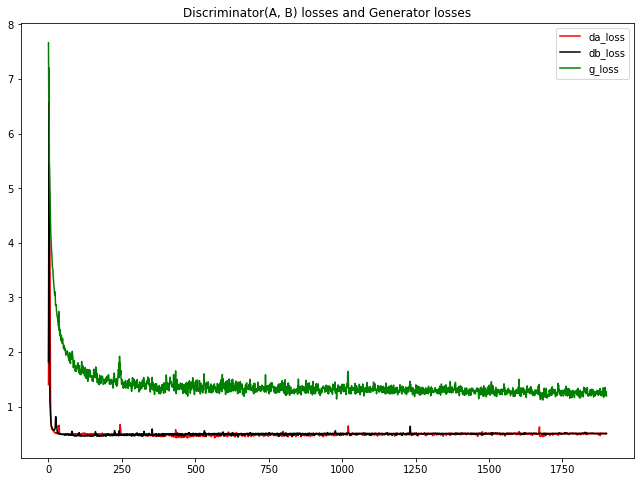

<Figure size 432x288 with 0 Axes>


time: 134 mins 38 s g_loss: [5.958765029907227, 1.0146592855453491, 0.9796521663665771, 0.0967354103922844, 0.12180467694997787, 0.0872679203748703, 0.11040458083152771] 


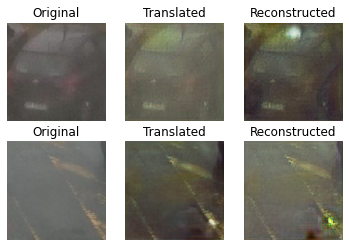

Epoch: 95 Batch: 19
Epoch: 96 / 100
Epoch: 96 Batch: 0
time: 136 mins 4 s g_loss: [6.345335006713867, 1.0050225257873535, 1.229644775390625, 0.09880902618169785, 0.12966789305210114, 0.09183105826377869, 0.11104657500982285] 


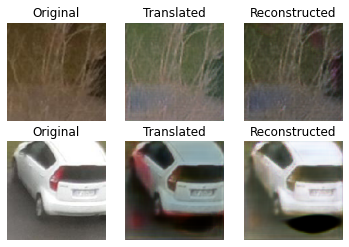

Epoch: 96 Batch: 19
Epoch: 97 / 100
Epoch: 97 Batch: 0
time: 137 mins 29 s g_loss: [6.341503143310547, 1.0565450191497803, 1.0709799528121948, 0.09700824320316315, 0.13380542397499084, 0.0858660563826561, 0.12589409947395325] 


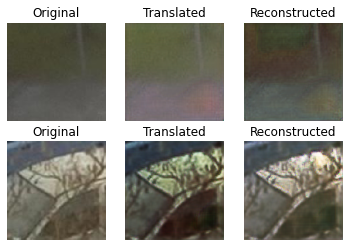

Epoch: 97 Batch: 19
Epoch: 98 / 100
Epoch: 98 Batch: 0
time: 138 mins 53 s g_loss: [6.338445663452148, 1.0334303379058838, 1.037002682685852, 0.10308768600225449, 0.1286420375108719, 0.09508895128965378, 0.12165717780590057] 


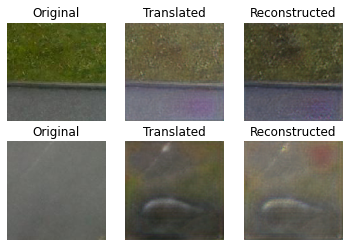

Epoch: 98 Batch: 19
Epoch: 99 / 100
Epoch: 99 Batch: 0
time: 140 mins 18 s g_loss: [6.471534729003906, 1.0436550378799438, 1.1460814476013184, 0.1018175408244133, 0.13376393914222717, 0.09390179067850113, 0.12009638547897339] 


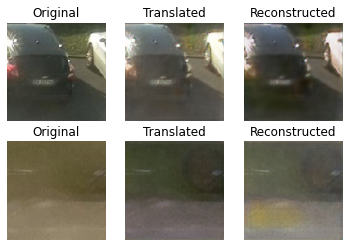

Epoch: 99 Batch: 19

In [0]:
import numpy as np
import scipy
import sys
import os
import cv2
import time

import matplotlib.pyplot as plt
import tensorflow_addons as tfa

exec('from __future__ import print_function, division')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, Concatenate
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Model
from keras.optimizers import Adam

from glob import glob
from IPython.display import clear_output
from tensorflow.keras.preprocessing.image import img_to_array

# Source path
root_d = '/content/gdrive/FYP/a_sunshine_cyc_data/'
#root_d = '/content/gdrive/FYP/5000data/'

# Output path
save_dir = '/content/gdrive/FYP/Bright_CycGan_Output/a_sunshine_cyc_data/test'

# Image Size
wide = 128
height = 128
channel = 3
img_shape = (wide, height, channel)

# Number of filters in the first layer of G and D
gf = 32 #int(wide / 4)
df = 64 #int(wide / 2)

re_size = (wide, height)
patch = int(128 / 2**4 * (wide / 128.0))

def conv2d(layer_input, filters, f_size=4, normalization=True):
    """Discriminator layer"""
    d = layers.Conv2D(filters, kernel_size=f_size,
                strides=2, padding='same')(layer_input)
    d = layers.LeakyReLU(alpha=0.2)(d)

    if normalization:
        d = tfa.layers.InstanceNormalization()(d)
    return d

def deconv2d(layer_input, skip_input, filters, f_size=4, dropout_rate=0):
    """Layers used during upsampling"""
    u = layers.UpSampling2D(size=2)(layer_input)
    u = layers.Conv2D(filters, kernel_size=f_size, strides=1,
                padding='same', activation='relu')(u)
    if dropout_rate:
        u = layers.Dropout(dropout_rate)(u)
    u = tfa.layers.InstanceNormalization()(u)
    u = layers.Concatenate()([u, skip_input])
    return u

def build_discriminator(lay):
    if lay == '3':
        img = layers.Input(shape=img_shape)
        d1 = conv2d(img, df, normalization=False)
        d2 = conv2d(d1, df * 2)
        d3 = conv2d(d2, df * 4)

        validity = layers.Conv2D(1, kernel_size=4, strides=1, padding='same')(d3)
    else:
        img = layers.Input(shape=img_shape)
        d1 = conv2d(img, df, normalization=False)
        d2 = conv2d(d1, df * 2)
        d3 = conv2d(d2, df * 4)
        d4 = conv2d(d3, df * 8)

        validity = layers.Conv2D(1, kernel_size=4, strides=1, padding='same')(d4)
    return keras.models.Model(img, validity)

def build_generator(lay):
    """U-Net Generator"""
    # Image input
    d0 = keras.Input(shape=img_shape)
    if lay == '3':   
        # Downsampling)
        d1 = conv2d(d0, gf)
        d2 = conv2d(d1, gf * 2)
        d3 = conv2d(d2, gf * 4)
    
        # Upsampling
        u1 = deconv2d(d3, d2, gf * 2)
        u2 = deconv2d(u1, d1, gf)
    
        u4 = layers.UpSampling2D(size=2)(u2)
        output_img = layers.Conv2D(3, kernel_size=4,
                                  strides=1, padding='same', activation='tanh')(u4)
    
    else:
        # Downsampling
        d1 = conv2d(d0, gf)
        d2 = conv2d(d1, gf * 2)
        d3 = conv2d(d2, gf * 4)
        d4 = conv2d(d3, gf * 8)
        # Upsampling
        u1 = deconv2d(d4, d3, gf * 4)
        u2 = deconv2d(u1, d2, gf * 2)
        u3 = deconv2d(u2, d1, gf)
    
        u4 = layers.UpSampling2D(size=2)(u3)
        output_img = layers.Conv2D(3, kernel_size=4,
                                  strides=1, padding='same', activation='tanh')(u4)
    return keras.models.Model(d0, output_img)


# save the generator models to file
def save_models(epoch, batch_i, g_model_AtoB, g_model_BtoA):
    # save the first generator model
    model_path = save_dir + 'gen_model/'
    filename1 = model_path + 'g_model_AB_%d_%d.h5' % (epoch, batch_i)
    g_model_AtoB.save(filename1)
    # save the second generator model
    filename2 = model_path + 'g_model_BA_%d_%d.h5' % (epoch, batch_i)
    g_model_BtoA.save(filename2)
    print('>Saved: %s and %s' % (filename1, filename2))

def average(lst): 
    return sum(lst) / len(lst) 
    
# plot the losses during training
def plot_losses(losses):
    da_loss = []
    db_loss = []
    gc = []
    for i in range(len(losses)):
        da_loss.append(losses[i][0].mean())
        db_loss.append(losses[i][1].mean())
        gc.append(average(losses[i][3]))

    epochs = range(len(da_loss))
    plt.plot(epochs, da_loss, 'r', label='da_loss')
    plt.plot(epochs, db_loss, 'k', label='db_loss')
    plt.plot(epochs, gc, 'g', label='g_loss')
    plt.title('Discriminator(A, B) losses and Generator losses')
    plt.legend()
    fig = plt.gcf()
    fig.set_size_inches(11,8)
    plt.figure()
    plt.show()

def load_batch(batch_size=1, is_testing = False, b_size = re_size):
    data_type = "train" if not is_testing else "val"
    path_A = glob(root_d + '%sA/*' % data_type)
    path_B = glob(root_d + '%sB/*' % data_type)
    
    n_batches = int(min(len(path_A), len(path_B)) / batch_size)
    total_samples = n_batches * batch_size

    path_A = np.random.choice(path_A, total_samples, replace=False)
    path_B = np.random.choice(path_B, total_samples, replace=False)

    for i in range(n_batches-1):
        batch_A = path_A[i*batch_size:(i+1)*batch_size]
        batch_B = path_B[i*batch_size:(i+1)*batch_size]
        imgs_A, imgs_B = [], []
        for img_A, img_B in zip(batch_A, batch_B):
            img_A = load_img(img_A, target_size = b_size)
            img_B = load_img(img_B, target_size = b_size)
            img_A = img_to_array(img_A)
            img_B = img_to_array(img_B)
            if not is_testing and np.random.random() > 0.5:
                img_A = np.fliplr(img_A)
                img_B = np.fliplr(img_B)

            imgs_A.append(img_A)
            imgs_B.append(img_B)

        imgs_A = np.array(imgs_A)/127.5 - 1.
        imgs_B = np.array(imgs_B)/127.5 - 1.

        yield imgs_A, imgs_B

def load_data(domain, batch_size=1, is_testing=False, b_size = re_size):
    data_type = "train%s" % domain if not is_testing else "test%s" % domain
    path = glob(root_d + '%s/*' % data_type)

    batch_images = np.random.choice(path, size = batch_size)

    imgs = []
    for img_path in batch_images:
        img = load_img(img_path, target_size = b_size)
        img = img_to_array(img)
        if not is_testing and np.random.random() > 0.5:
            img = np.fliplr(img)
        imgs.append(img)
        
    imgs = np.array(imgs)/127.5 - 1.
    return imgs

def sample_images(epoch, batch_i, g_AB, g_BA):
    r, c = 2, 3

    imgs_A = load_data(domain="A", batch_size=1, is_testing=True)
    imgs_B = load_data(domain="B", batch_size=1, is_testing=True)

    # Translate images to the other domain
    fake_B = g_AB.predict(imgs_A)
    fake_A = g_BA.predict(imgs_B)
    # Translate back to original domain
    reconstr_A = g_BA.predict(fake_B)
    reconstr_B = g_AB.predict(fake_A)

    gen_imgs = np.concatenate([imgs_A, fake_B, reconstr_A, imgs_B, fake_A, reconstr_B])

    # Rescale images 0 - 1
    gen_imgs = 0.5 * gen_imgs + 0.5

    titles = ['Original', 'Translated', 'Reconstructed']
    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(gen_imgs[cnt])
            axs[i, j].set_title(titles[j])
            axs[i,j].axis('off')
            cnt += 1
    fig.savefig(save_dir + "%d_%d.png" % (epoch, batch_i))
    plt.show()
    #plt.close(fig)
    return g_AB, g_BA


def save_image(epoch, batch_i, g_AB, g_BA):
    imgs_A = load_data(domain="A", batch_size=1, is_testing=True)
    imgs_B = load_data(domain="B", batch_size=1, is_testing=True)

    # Translate images to the other domain
    fake_B = g_AB.predict(imgs_A)
    fake_A = g_BA.predict(imgs_B)
    # Translate back to original domain
    reconstr_A = g_BA.predict(fake_B)
    reconstr_B = g_AB.predict(fake_A)

    gen_imgs = np.concatenate([imgs_A, fake_B, reconstr_A, imgs_B, fake_A, reconstr_B])

    # Rescale images 0 - 1
    gen_imgs = 0.5 * gen_imgs + 0.5

    r, c = 2, 3
    titles = ['Original', 'Translated', 'Reconstructed']
    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(gen_imgs[cnt])
            axs[i, j].set_title(titles[j])
            axs[i,j].axis('off')
            cnt += 1
    fig.savefig(save_dir + "%d_%d.png" % (epoch, batch_i))
    plt.show()
    #plt.close(fig)
    
    cnt = 0
    for i in [1, 2, 4, 5]:
        fig, axs = plt.subplots()
        img = gen_imgs[i]
        axs.imshow(img)
        save_path = save_dir + "generate_img/generate_img_%d_%d_%d.png" % (epoch, batch_i, cnt)
        cnt += 1
        fig.savefig(save_path)
        plt.close(fig)
        
    return g_AB, g_BA

def gan_init(lay):
    g_AB = build_generator(lay)
    g_BA = build_generator(lay)
    d_A = build_discriminator(lay)
    d_B = build_discriminator(lay)
    optimizer1 =  keras.optimizers.Adam(0.0002, 0.5)
    d_A.compile(loss='mse',
                optimizer=optimizer1,
                metrics=['accuracy'])
    d_B.compile(loss='mse',
                optimizer=optimizer1,
                metrics=['accuracy'])
    img_A = layers.Input(shape=img_shape)
    img_B = layers.Input(shape=img_shape)

    fake_B = g_AB(img_A)
    fake_A = g_BA(img_B)
    # Translate images back to original domain
    reconstr_A = g_BA(fake_B)
    reconstr_B = g_AB(fake_A)
    # Identity mapping of images
    img_A_id = g_BA(img_A)
    img_B_id = g_AB(img_B)

    d_A.trainable = False
    d_B.trainable = False

    valid_A = d_A(fake_A)
    valid_B = d_B(fake_B)

    lambda_cycle = 10.0
    lambda_id = 0.9 * lambda_cycle  
    combined = keras.models.Model(inputs=[img_A, img_B],
                                  outputs=[valid_A, valid_B,
                                          reconstr_A, reconstr_B,
                                          img_A_id, img_B_id])
    
    com_optimizer = keras.optimizers.Adam(0.0002, 0.5)
    combined.compile(loss=['mse', 'mse',
                                'mae', 'mae',
                                'mae', 'mae'],
                    loss_weights=[1, 1,
                                  lambda_cycle, lambda_cycle,
                                  lambda_id, lambda_id],
                    optimizer = com_optimizer)
    return combined, g_AB, g_BA, d_A, d_B

def train(epochs, batch_size=1, sample_interval=50, lay = '4'):
    # Adversarial loss ground truths
    if lay == '3':
        disc_patch = (patch*2, patch*2, 1)
        batch_size = 8
    else:
        disc_patch = (patch, patch, 1)

    if not os.path.exists(save_dir):
        os.makedirs(save_dir + 'generate_img/')

    valid = np.ones((batch_size,) + disc_patch)
    fake = np.zeros((batch_size,) + disc_patch)
    combined = ''
    losses = []
    combined, g_AB, g_BA, d_A, d_B = gan_init(lay)

    print('\nGenerator detail:\n')
    g_AB.summary()
    print('\n\n---------------------------------\n\n')
    print('\nDiscriminator detail:\n')
    d_A.summary()

    print('\n-----------Start!----------')
    st_time = time.time()
    for epoch in range(epochs):
        if epoch % 5 == 0 and epoch != 0:
            clear_output(wait=True)
        print('\nEpoch: %d / %d' % (epoch, epochs))
        for batch_i, (imgs_A, imgs_B) in enumerate(load_batch(batch_size)):
            # ----------------------
            #  Train Discriminators
            # ----------------------
            print('\rEpoch: %d Batch: %d' % (epoch, batch_i), end = '')
            # Translate images to opposite domain
            fake_B = g_AB.predict(imgs_A)
            fake_A = g_BA.predict(imgs_B)
            
            # Train the discriminators (original images = real / translated = Fake)
            dA_loss_real = d_A.train_on_batch(imgs_A, valid)
            dA_loss_fake = d_A.train_on_batch(fake_A, fake)
            dA_loss = 0.5 * np.add(dA_loss_real, dA_loss_fake)
            dB_loss_real = d_B.train_on_batch(imgs_B, valid)
            dB_loss_fake = d_B.train_on_batch(fake_B, fake)
            dB_loss = 0.5 * np.add(dB_loss_real, dB_loss_fake)

            # Total discriminator loss
            d_loss = 0.5 * np.add(dA_loss, dB_loss)

            # ------------------
            #  Train Generators
            # ------------------
            
            # Train the generators
            g_loss = combined.train_on_batch([imgs_A, imgs_B],
                                              [valid, valid,
                                              imgs_A, imgs_B,
                                              imgs_A, imgs_B])
            seconds = time.time() - st_time
            losses.append((dA_loss, dB_loss, d_loss, g_loss))
            if epoch != 0 and epoch % 5 == 0 and batch_i == 0:
                save_models(epoch, batch_i, g_AB, g_BA)
                plot_losses(losses)
            # If at save interval => plot the generated image samples
            if batch_i % sample_interval == 0:
                print('\ntime: %d mins %d s g_loss: %s ' % (int(seconds/60.0), int(seconds)%60, str(g_loss)))
                if epoch < 5: #30
                    g_AB, g_BA = sample_images(epoch, batch_i, g_AB, g_BA)
                else:
                    g_AB, g_BA = save_image(epoch, batch_i, g_AB, g_BA)


                
def create_output_path():
    global save_dir
    check = True
    num = 0
    while check:
        save_d = save_dir + str(num) + '/'
        if os.path.exists(save_d) == True:
            num += 1
        else:
            save_dir = save_d
            check = False
            os.makedirs(save_dir + 'generate_img/')
            os.makedirs(save_dir + 'gen_model/')
    print('Save location is: %s\n'%save_dir)

def main(argv):
    try:
        if len(argv) != 1:
            print('Unable Input!')
            sys.exit(0)

        create_output_path()
        train(epochs=100, batch_size=64, sample_interval=30, lay=argv)
    except:
        print('Please input INPUT, the formular is:\npython final_ver_cyclegan.py 3')
        sys.exit(1)
        
if __name__ == "__main__":
    main('4')

###### Darker and dataset


Epoch: 75 / 100
Epoch: 75 Batch: 0>Saved: /content/gdrive/FYP/Bright_CycGan_Output/a_dark_cyc_data/test6/gen_model/g_model_AB_75_0.h5 and /content/gdrive/FYP/Bright_CycGan_Output/a_dark_cyc_data/test6/gen_model/g_model_BA_75_0.h5


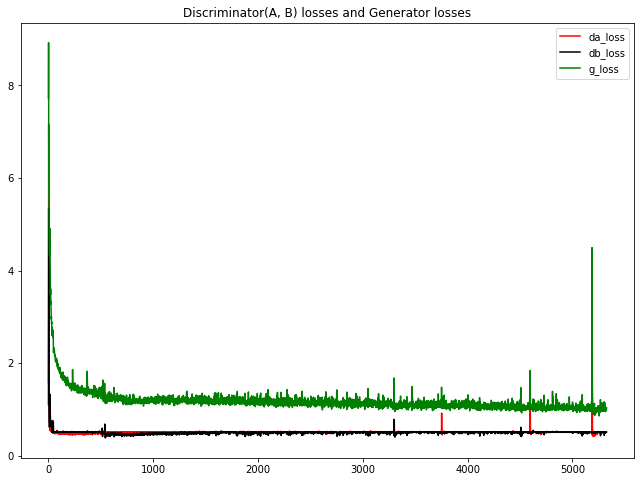

<Figure size 432x288 with 0 Axes>


time: 244 mins 59 s g_loss: [4.827338218688965, 0.9306563138961792, 1.1967850923538208, 0.09611742198467255, 0.053727928549051285, 0.08445990085601807, 0.049033746123313904] 


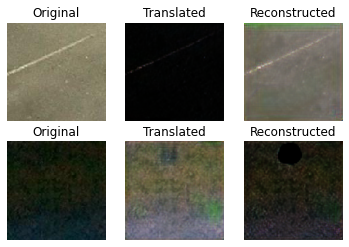

Epoch: 75 Batch: 30
time: 246 mins 10 s g_loss: [4.803677558898926, 1.0026435852050781, 1.166149616241455, 0.10792938619852066, 0.04669375345110893, 0.08452107757329941, 0.03644038736820221] 


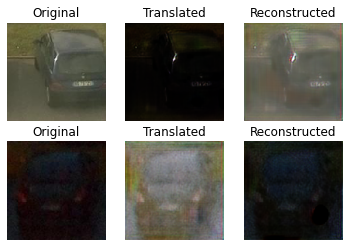

Epoch: 75 Batch: 60
time: 247 mins 21 s g_loss: [4.745719909667969, 1.0351003408432007, 1.0713152885437012, 0.09925267845392227, 0.050212759524583817, 0.08108161389827728, 0.046101730316877365] 


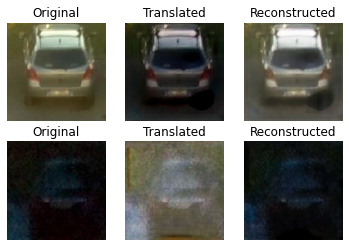

Epoch: 75 Batch: 70
Epoch: 76 / 100
Epoch: 76 Batch: 0
time: 247 mins 48 s g_loss: [4.975879669189453, 0.9860397577285767, 1.2815074920654297, 0.10043682157993317, 0.0518159493803978, 0.0864102691411972, 0.04534585401415825] 


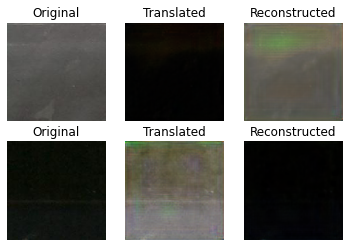

Epoch: 76 Batch: 30
time: 248 mins 59 s g_loss: [4.660003662109375, 0.9931737184524536, 0.9943045973777771, 0.0988822653889656, 0.05573897063732147, 0.08250004053115845, 0.04264584183692932] 


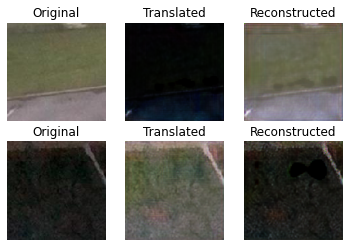

Epoch: 76 Batch: 60
time: 250 mins 9 s g_loss: [4.621832847595215, 1.0335482358932495, 1.0856211185455322, 0.08888677507638931, 0.06054287776350975, 0.06715252995491028, 0.04488828405737877] 


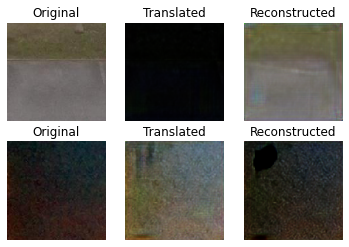

Epoch: 76 Batch: 70
Epoch: 77 / 100
Epoch: 77 Batch: 0
time: 250 mins 36 s g_loss: [4.660398960113525, 0.987250566482544, 1.1026592254638672, 0.09173373132944107, 0.05330897495150566, 0.07948869466781616, 0.04496264457702637] 


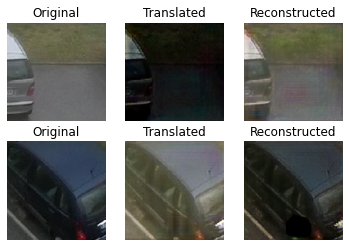

Epoch: 77 Batch: 30
time: 251 mins 46 s g_loss: [4.864367485046387, 1.0354689359664917, 1.4231019020080566, 0.09016995877027512, 0.04445470869541168, 0.0800573006272316, 0.03767044469714165] 


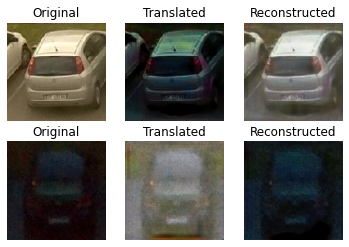

Epoch: 77 Batch: 60
time: 252 mins 56 s g_loss: [4.658796310424805, 1.0023596286773682, 1.0570383071899414, 0.09866048395633698, 0.04867274686694145, 0.0839996263384819, 0.041118841618299484] 


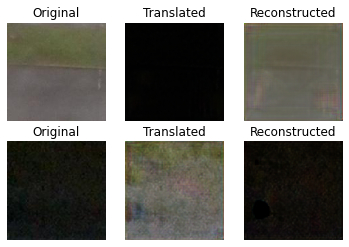

Epoch: 77 Batch: 70
Epoch: 78 / 100
Epoch: 78 Batch: 0
time: 253 mins 23 s g_loss: [4.690455436706543, 0.9943563938140869, 0.9575055241584778, 0.10107709467411041, 0.053770843893289566, 0.08873889595270157, 0.043496035039424896] 


In [0]:
import numpy as np
import scipy
import sys
import os
import cv2
import time

import matplotlib.pyplot as plt
import tensorflow_addons as tfa

exec('from __future__ import print_function, division')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, Concatenate
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Model
from keras.optimizers import Adam

from glob import glob
from IPython.display import clear_output
from tensorflow.keras.preprocessing.image import img_to_array

# Source path
root_d = '/content/gdrive/FYP/a_darker_cyc_data/'
#root_d = '/content/gdrive/FYP/5000data/'

# Output path
save_dir = '/content/gdrive/FYP/Bright_CycGan_Output/a_dark_cyc_data/test'

# Image Size
wide = 128
height = 128
channel = 3
img_shape = (wide, height, channel)

# Number of filters in the first layer of G and D
gf = 32 #int(wide / 4)
df = 64 #int(wide / 2)

re_size = (wide, height)
patch = int(128 / 2**4 * (wide / 128.0))

def conv2d(layer_input, filters, f_size=4, normalization=True):
    """Discriminator layer"""
    d = layers.Conv2D(filters, kernel_size=f_size,
                strides=2, padding='same')(layer_input)
    d = layers.LeakyReLU(alpha=0.2)(d)

    if normalization:
        d = tfa.layers.InstanceNormalization()(d)
    return d

def deconv2d(layer_input, skip_input, filters, f_size=4, dropout_rate=0):
    """Layers used during upsampling"""
    u = layers.UpSampling2D(size=2)(layer_input)
    u = layers.Conv2D(filters, kernel_size=f_size, strides=1,
                padding='same', activation='relu')(u)
    if dropout_rate:
        u = layers.Dropout(dropout_rate)(u)
    u = tfa.layers.InstanceNormalization()(u)
    u = layers.Concatenate()([u, skip_input])
    return u

def build_discriminator(lay):
    if lay == '3':
        img = layers.Input(shape=img_shape)
        d1 = conv2d(img, df, normalization=False)
        d2 = conv2d(d1, df * 2)
        d3 = conv2d(d2, df * 4)

        validity = layers.Conv2D(1, kernel_size=4, strides=1, padding='same')(d3)
    else:
        img = layers.Input(shape=img_shape)
        d1 = conv2d(img, df, normalization=False)
        d2 = conv2d(d1, df * 2)
        d3 = conv2d(d2, df * 4)
        d4 = conv2d(d3, df * 8)

        validity = layers.Conv2D(1, kernel_size=4, strides=1, padding='same')(d4)
    return keras.models.Model(img, validity)

def build_generator(lay):
    """U-Net Generator"""
    # Image input
    d0 = keras.Input(shape=img_shape)
    if lay == '3':   
        # Downsampling)
        d1 = conv2d(d0, gf)
        d2 = conv2d(d1, gf * 2)
        d3 = conv2d(d2, gf * 4)
    
        # Upsampling
        u1 = deconv2d(d3, d2, gf * 2)
        u2 = deconv2d(u1, d1, gf)
    
        u4 = layers.UpSampling2D(size=2)(u2)
        output_img = layers.Conv2D(3, kernel_size=4,
                                  strides=1, padding='same', activation='tanh')(u4)
    
    else:
        # Downsampling
        d1 = conv2d(d0, gf)
        d2 = conv2d(d1, gf * 2)
        d3 = conv2d(d2, gf * 4)
        d4 = conv2d(d3, gf * 8)
        # Upsampling
        u1 = deconv2d(d4, d3, gf * 4)
        u2 = deconv2d(u1, d2, gf * 2)
        u3 = deconv2d(u2, d1, gf)
    
        u4 = layers.UpSampling2D(size=2)(u3)
        output_img = layers.Conv2D(3, kernel_size=4,
                                  strides=1, padding='same', activation='tanh')(u4)
    return keras.models.Model(d0, output_img)


# save the generator models to file
def save_models(epoch, batch_i, g_model_AtoB, g_model_BtoA):
    # save the first generator model
    model_path = save_dir + 'gen_model/'
    filename1 = model_path + 'g_model_AB_%d_%d.h5' % (epoch, batch_i)
    g_model_AtoB.save(filename1)
    # save the second generator model
    filename2 = model_path + 'g_model_BA_%d_%d.h5' % (epoch, batch_i)
    g_model_BtoA.save(filename2)
    print('>Saved: %s and %s' % (filename1, filename2))

def average(lst): 
    return sum(lst) / len(lst) 
    
# plot the losses during training
def plot_losses(losses):
    da_loss = []
    db_loss = []
    gc = []
    for i in range(len(losses)):
        da_loss.append(losses[i][0].mean())
        db_loss.append(losses[i][1].mean())
        gc.append(average(losses[i][3]))

    epochs = range(len(da_loss))
    plt.plot(epochs, da_loss, 'r', label='da_loss')
    plt.plot(epochs, db_loss, 'k', label='db_loss')
    plt.plot(epochs, gc, 'g', label='g_loss')
    plt.title('Discriminator(A, B) losses and Generator losses')
    plt.legend()
    fig = plt.gcf()
    fig.set_size_inches(11,8)
    plt.figure()
    plt.show()

def load_batch(batch_size=1, is_testing = False, b_size = re_size):
    data_type = "train" if not is_testing else "val"
    path_A = glob(root_d + '%sA/*' % data_type)
    path_B = glob(root_d + '%sB/*' % data_type)
    
    n_batches = int(min(len(path_A), len(path_B)) / batch_size)
    total_samples = n_batches * batch_size

    path_A = np.random.choice(path_A, total_samples, replace=False)
    path_B = np.random.choice(path_B, total_samples, replace=False)

    for i in range(n_batches-1):
        batch_A = path_A[i*batch_size:(i+1)*batch_size]
        batch_B = path_B[i*batch_size:(i+1)*batch_size]
        imgs_A, imgs_B = [], []
        for img_A, img_B in zip(batch_A, batch_B):
            img_A = load_img(img_A, target_size = b_size)
            img_B = load_img(img_B, target_size = b_size)
            img_A = img_to_array(img_A)
            img_B = img_to_array(img_B)
            if not is_testing and np.random.random() > 0.5:
                img_A = np.fliplr(img_A)
                img_B = np.fliplr(img_B)

            imgs_A.append(img_A)
            imgs_B.append(img_B)

        imgs_A = np.array(imgs_A)/127.5 - 1.
        imgs_B = np.array(imgs_B)/127.5 - 1.

        yield imgs_A, imgs_B

def load_data(domain, batch_size=1, is_testing=False, b_size = re_size):
    data_type = "train%s" % domain if not is_testing else "test%s" % domain
    path = glob(root_d + '%s/*' % data_type)

    batch_images = np.random.choice(path, size = batch_size)

    imgs = []
    for img_path in batch_images:
        img = load_img(img_path, target_size = b_size)
        img = img_to_array(img)
        if not is_testing and np.random.random() > 0.5:
            img = np.fliplr(img)
        imgs.append(img)
        
    imgs = np.array(imgs)/127.5 - 1.
    return imgs

def sample_images(epoch, batch_i, g_AB, g_BA):
    r, c = 2, 3

    imgs_A = load_data(domain="A", batch_size=1, is_testing=True)
    imgs_B = load_data(domain="B", batch_size=1, is_testing=True)

    # Translate images to the other domain
    fake_B = g_AB.predict(imgs_A)
    fake_A = g_BA.predict(imgs_B)
    # Translate back to original domain
    reconstr_A = g_BA.predict(fake_B)
    reconstr_B = g_AB.predict(fake_A)

    gen_imgs = np.concatenate([imgs_A, fake_B, reconstr_A, imgs_B, fake_A, reconstr_B])

    # Rescale images 0 - 1
    gen_imgs = 0.5 * gen_imgs + 0.5

    titles = ['Original', 'Translated', 'Reconstructed']
    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(gen_imgs[cnt])
            axs[i, j].set_title(titles[j])
            axs[i,j].axis('off')
            cnt += 1
    fig.savefig(save_dir + "%d_%d.png" % (epoch, batch_i))
    plt.show()
    #plt.close(fig)
    return g_AB, g_BA


def save_image(epoch, batch_i, g_AB, g_BA):
    imgs_A = load_data(domain="A", batch_size=1, is_testing=True)
    imgs_B = load_data(domain="B", batch_size=1, is_testing=True)

    # Translate images to the other domain
    fake_B = g_AB.predict(imgs_A)
    fake_A = g_BA.predict(imgs_B)
    # Translate back to original domain
    reconstr_A = g_BA.predict(fake_B)
    reconstr_B = g_AB.predict(fake_A)

    gen_imgs = np.concatenate([imgs_A, fake_B, reconstr_A, imgs_B, fake_A, reconstr_B])

    # Rescale images 0 - 1
    gen_imgs = 0.5 * gen_imgs + 0.5

    r, c = 2, 3
    titles = ['Original', 'Translated', 'Reconstructed']
    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(gen_imgs[cnt])
            axs[i, j].set_title(titles[j])
            axs[i,j].axis('off')
            cnt += 1
    fig.savefig(save_dir + "%d_%d.png" % (epoch, batch_i))
    plt.show()
    #plt.close(fig)
    
    cnt = 0
    for i in [1, 2, 4, 5]:
        fig, axs = plt.subplots()
        img = gen_imgs[i]
        axs.imshow(img)
        save_path = save_dir + "generate_img/generate_img_%d_%d_%d.png" % (epoch, batch_i, cnt)
        cnt += 1
        fig.savefig(save_path)
        plt.close(fig)
        
    return g_AB, g_BA

def gan_init(lay):
    g_AB = build_generator(lay)
    g_BA = build_generator(lay)
    d_A = build_discriminator(lay)
    d_B = build_discriminator(lay)
    optimizer1 =  keras.optimizers.Adam(0.0002, 0.5)
    d_A.compile(loss='mse',
                optimizer=optimizer1,
                metrics=['accuracy'])
    d_B.compile(loss='mse',
                optimizer=optimizer1,
                metrics=['accuracy'])
    img_A = layers.Input(shape=img_shape)
    img_B = layers.Input(shape=img_shape)

    fake_B = g_AB(img_A)
    fake_A = g_BA(img_B)
    # Translate images back to original domain
    reconstr_A = g_BA(fake_B)
    reconstr_B = g_AB(fake_A)
    # Identity mapping of images
    img_A_id = g_BA(img_A)
    img_B_id = g_AB(img_B)

    d_A.trainable = False
    d_B.trainable = False

    valid_A = d_A(fake_A)
    valid_B = d_B(fake_B)

    lambda_cycle = 10.0
    lambda_id = 0.9 * lambda_cycle  
    combined = keras.models.Model(inputs=[img_A, img_B],
                                  outputs=[valid_A, valid_B,
                                          reconstr_A, reconstr_B,
                                          img_A_id, img_B_id])
    
    com_optimizer = keras.optimizers.Adam(0.0002, 0.5)
    combined.compile(loss=['mse', 'mse',
                                'mae', 'mae',
                                'mae', 'mae'],
                    loss_weights=[1, 1,
                                  lambda_cycle, lambda_cycle,
                                  lambda_id, lambda_id],
                    optimizer = com_optimizer)
    return combined, g_AB, g_BA, d_A, d_B

def train(epochs, batch_size=1, sample_interval=50, lay = '4'):
    # Adversarial loss ground truths
    if lay == '3':
        disc_patch = (patch*2, patch*2, 1)
        batch_size = 8
    else:
        disc_patch = (patch, patch, 1)

    if not os.path.exists(save_dir):
        os.makedirs(save_dir + 'generate_img/')

    valid = np.ones((batch_size,) + disc_patch)
    fake = np.zeros((batch_size,) + disc_patch)
    combined = ''
    losses = []
    combined, g_AB, g_BA, d_A, d_B = gan_init(lay)

    print('\nGenerator detail:\n')
    g_AB.summary()
    print('\n\n---------------------------------\n\n')
    print('\nDiscriminator detail:\n')
    d_A.summary()

    print('\n-----------Start!----------')
    st_time = time.time()
    for epoch in range(epochs):
        if epoch % 5 == 0 and epoch != 0:
            clear_output(wait=True)
        print('\nEpoch: %d / %d' % (epoch, epochs))
        for batch_i, (imgs_A, imgs_B) in enumerate(load_batch(batch_size)):
            # ----------------------
            #  Train Discriminators
            # ----------------------
            print('\rEpoch: %d Batch: %d' % (epoch, batch_i), end = '')
            # Translate images to opposite domain
            fake_B = g_AB.predict(imgs_A)
            fake_A = g_BA.predict(imgs_B)
            
            # Train the discriminators (original images = real / translated = Fake)
            dA_loss_real = d_A.train_on_batch(imgs_A, valid)
            dA_loss_fake = d_A.train_on_batch(fake_A, fake)
            dA_loss = 0.5 * np.add(dA_loss_real, dA_loss_fake)
            dB_loss_real = d_B.train_on_batch(imgs_B, valid)
            dB_loss_fake = d_B.train_on_batch(fake_B, fake)
            dB_loss = 0.5 * np.add(dB_loss_real, dB_loss_fake)

            # Total discriminator loss
            d_loss = 0.5 * np.add(dA_loss, dB_loss)

            # ------------------
            #  Train Generators
            # ------------------
            
            # Train the generators
            g_loss = combined.train_on_batch([imgs_A, imgs_B],
                                              [valid, valid,
                                              imgs_A, imgs_B,
                                              imgs_A, imgs_B])
            seconds = time.time() - st_time
            losses.append((dA_loss, dB_loss, d_loss, g_loss))
            if epoch != 0 and epoch % 5 == 0 and batch_i == 0:
                save_models(epoch, batch_i, g_AB, g_BA)
                plot_losses(losses)
            # If at save interval => plot the generated image samples
            if batch_i % sample_interval == 0:
                print('\ntime: %d mins %d s g_loss: %s ' % (int(seconds/60.0), int(seconds)%60, str(g_loss)))
                if epoch < 5: #30
                    g_AB, g_BA = sample_images(epoch, batch_i, g_AB, g_BA)
                else:
                    g_AB, g_BA = save_image(epoch, batch_i, g_AB, g_BA)


                
def create_output_path():
    global save_dir
    check = True
    num = 0
    while check:
        save_d = save_dir + str(num) + '/'
        if os.path.exists(save_d) == True:
            num += 1
        else:
            save_dir = save_d
            check = False
            os.makedirs(save_dir + 'generate_img/')
            os.makedirs(save_dir + 'gen_model/')
    print('Save location is: %s\n'%save_dir)

def main(argv):
    try:
        if len(argv) != 1:
            print('Unable Input!')
            sys.exit(0)

        create_output_path()
        train(epochs=100, batch_size=32, sample_interval=30, lay=argv)
    except:
        print('Please input INPUT, the formular is:\npython final_ver_cyclegan.py 3')
        sys.exit(1)
        
if __name__ == "__main__":
    main('4')